In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from datasets import load_dataset
import pandas as pd

# Load dataset from Hugging Face
dataset = load_dataset("AlexanderHolmes0/true-fake-news", split="train")

# Convert it to a Pandas DataFrame
df = pd.DataFrame(dataset)


C:\Users\lithi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\lithi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lithi\.cache\huggingface\hub\datasets--AlexanderHolmes0--true-fake-news. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/doc

In [8]:
df.sample(5)

,label,text
10215,1,Have you ever noticed how DHS Director Jeh Joh...
19316,1,When they go low we go high -Former First La...
4175,1,"Milton Parker, a former paraprofessional (like..."
3926,1,Russia interfered in the 2016 U.S. presidentia...
15883,1,Christian fundamentalists just can’t keep thei...


In [9]:
df['label'].value_counts()

label
1    17595
0    16077
Name: count, dtype: int64

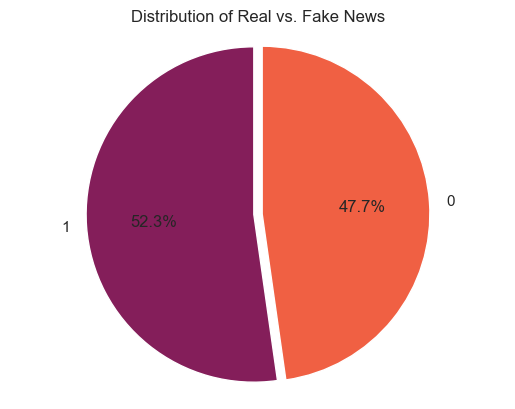

In [36]:
label_counts = df['label'].value_counts()

colors = sns.color_palette('rocket', len(label_counts))

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=[0.05, 0])
plt.title('Distribution of Real vs. Fake News')
plt.axis('equal') 
plt.show()


C:\Users\lithi\AppData\Local\Temp\ipykernel_17360\2788861290.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Words', y='Frequency', data=real_word_freq_df, palette='Spectral')


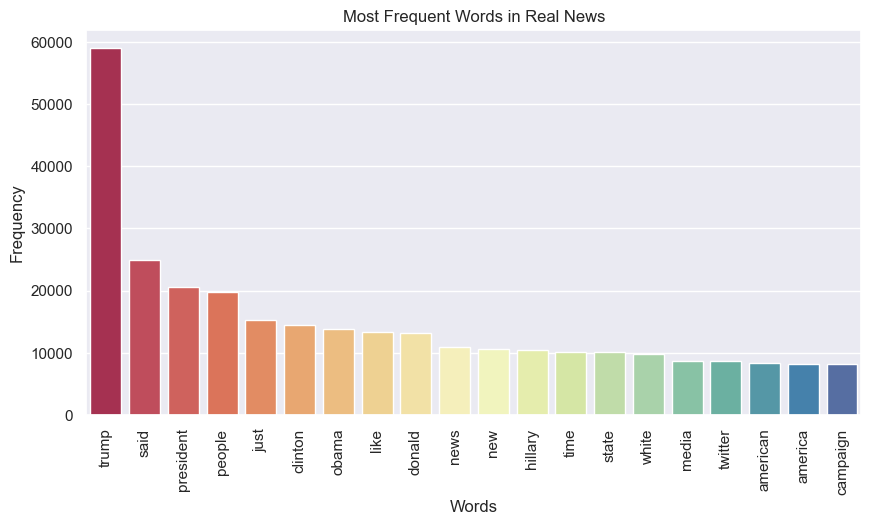

C:\Users\lithi\AppData\Local\Temp\ipykernel_17360\2788861290.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Words', y='Frequency', data=fake_word_freq_df, palette='Spectral')


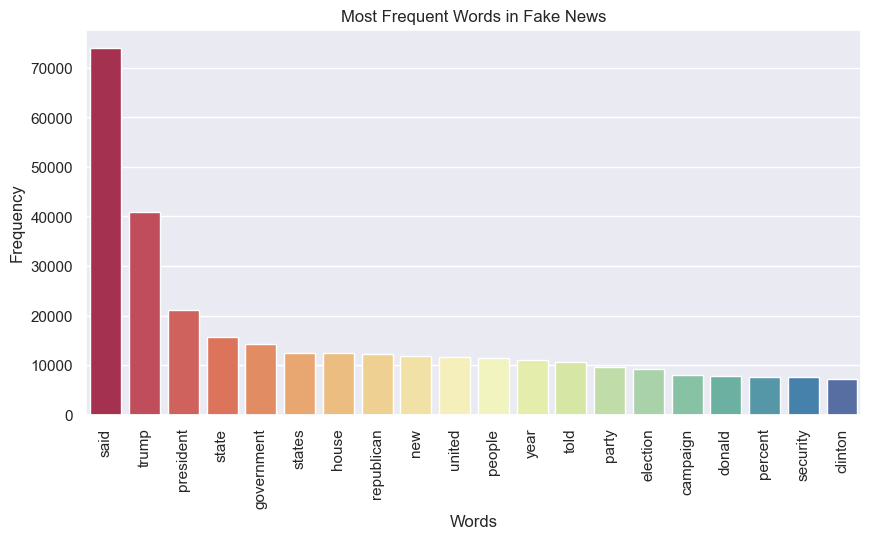

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

# Filter real and fake news
df_real = df[df['label'] == 1]
df_fake = df[df['label'] == 0]

# Initialize CountVectorizer to analyze most frequent words
vectorizer = CountVectorizer(stop_words='english', max_features=20)

# Get word frequencies for real news
real_counts = vectorizer.fit_transform(df_real['text'])
real_words = vectorizer.get_feature_names_out()
real_word_freq = real_counts.toarray().sum(axis=0)  # Get word frequencies

# Get word frequencies for fake news
fake_counts = vectorizer.fit_transform(df_fake['text'])
fake_words = vectorizer.get_feature_names_out()
fake_word_freq = fake_counts.toarray().sum(axis=0)  # Get word frequencies

# Create DataFrame for real news word frequencies
real_word_freq_df = pd.DataFrame({'Words': real_words, 'Frequency': real_word_freq})
real_word_freq_df = real_word_freq_df.sort_values(by='Frequency', ascending=False)

# Create DataFrame for fake news word frequencies
fake_word_freq_df = pd.DataFrame({'Words': fake_words, 'Frequency': fake_word_freq})
fake_word_freq_df = fake_word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot most frequent words in real news
plt.figure(figsize=(10, 5))
sns.barplot(x='Words', y='Frequency', data=real_word_freq_df, palette='Spectral')
plt.xticks(rotation=90)
plt.title('Most Frequent Words in Real News')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Plot most frequent words in fake news
plt.figure(figsize=(10, 5))
sns.barplot(x='Words', y='Frequency', data=fake_word_freq_df, palette='Spectral')
plt.xticks(rotation=90)
plt.title('Most Frequent Words in Fake News')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


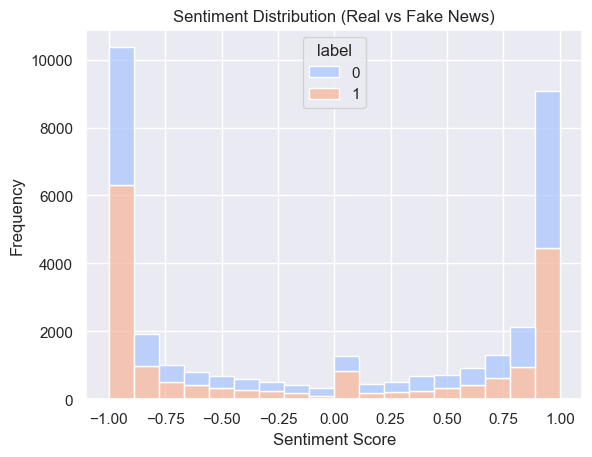

In [29]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Sentiment analysis using NLTK
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Plot the sentiment distribution for real and fake news
sns.histplot(df, x='sentiment', hue='label', multiple='stack', palette='coolwarm')
plt.title('Sentiment Distribution (Real vs Fake News)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


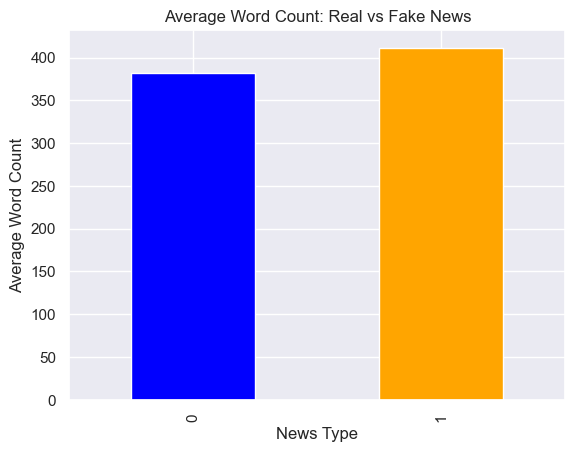

In [30]:
df.groupby('label')['text_length'].mean().plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Word Count: Real vs Fake News')
plt.xlabel('News Type')
plt.ylabel('Average Word Count')
plt.show()


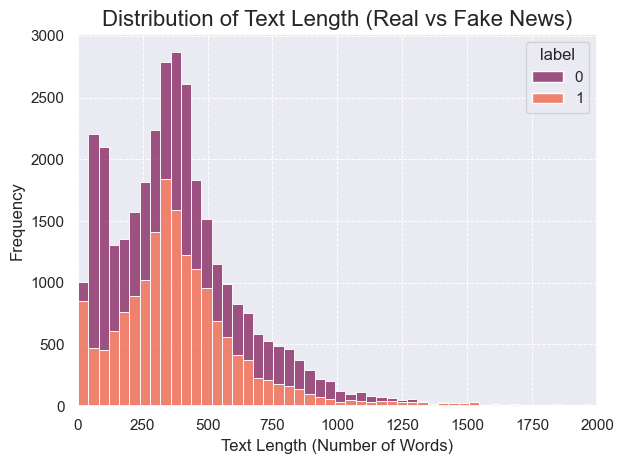

In [33]:
# Filter data to include only text lengths between 1 and 3000
df_filtered = df[df['text_length'].between(1, 2000)]

# Create a histogram plot with improved aesthetics
sns.histplot(df_filtered, x='text_length', hue='label', multiple='stack', bins=50, palette='rocket')

# Set axis limits for a cleaner view
plt.xlim(0, 2000)

# Add titles and labels
plt.title('Distribution of Text Length (Real vs Fake News)', fontsize=16)
plt.xlabel('Text Length (Number of Words)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customize the overall look
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()
